# Exploratory Data Analysis

 Roles to Explore:



In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from  datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US Data Analyst roles

In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'United States')]

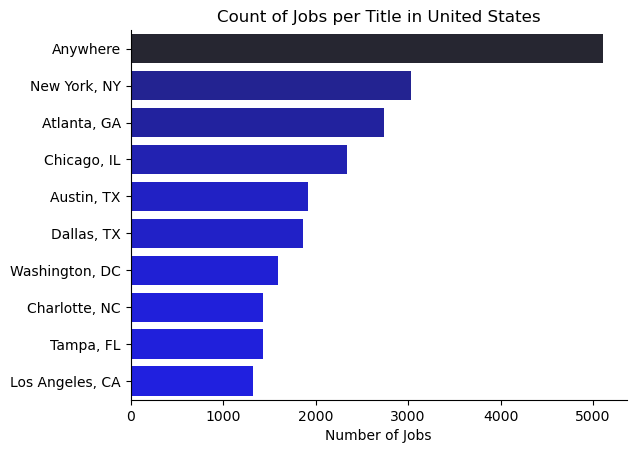

In [10]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Jobs per Title in United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


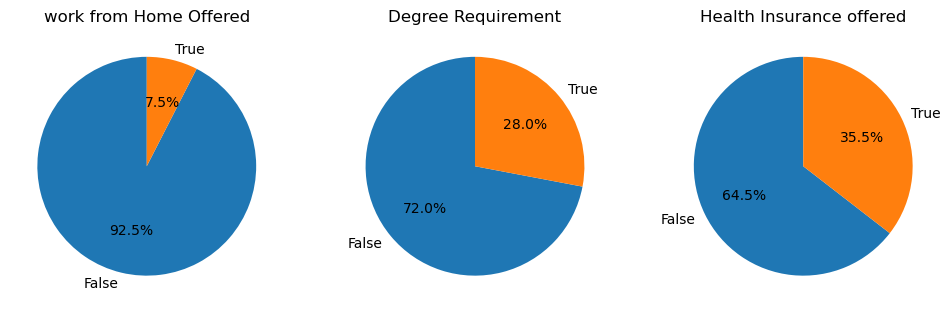

In [12]:
dict_column = {
    'job_work_from_home': 'work from Home Offered',
    'job_no_degree_mention' :'Degree Requirement',
    'job_health_insurance': 'Health Insurance offered'
}

fig, ax= plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (colum,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[colum].value_counts(),labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

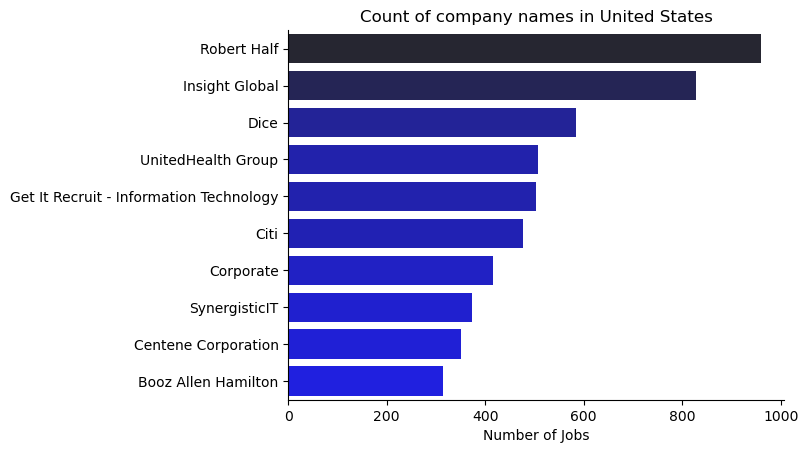

In [13]:
df_plot_company = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot_company, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of company names in United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()